Análisis exploratorio de los datos: (Exploratory Data Analysis-EDA)

In [28]:
#Importación librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [29]:
df_reviews = pd.read_csv('data/user_reviews_clean.csv', encoding='utf-8')

EDA  de steam_games

In [30]:
# Carga el archivo CSV en un DataFrame
steam_games = pd.read_csv('data/df_games_clean.csv')
steam_games.head()

,genres,title,price,id,year
0,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,4.99,761140,2018
1,"['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Free To Play,643980,2018
2,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Free to Play,670290,2017
3,"['Action', 'Adventure', 'Casual']",弹炸人2222,0.99,767400,2017
4,"['Action', 'Adventure', 'Simulation']",Battle Royale Trainer,3.99,772540,2018


In [31]:
#Tamaño del DataFrame 
steam_games.shape

(27617, 5)

Obtenermos información general de los datos y cantidad de nulos 

In [32]:
#Detalles sobre las columnas, los tipos de datos, los valores no nulos y la memoria utilizada por el DataFrame.
steam_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27617 entries, 0 to 27616
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   genres  27617 non-null  object
 1   title   27617 non-null  object
 2   price   27617 non-null  object
 3   id      27617 non-null  int64 
 4   year    27617 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.1+ MB


In [33]:
#Observamos los nulos
steam_games.isnull().sum()

genres    0
title     0
price     0
id        0
year      0
dtype: int64

In [34]:
# Descripción de los géneros de videojuegos
print(steam_games.genres.describe())

count          27617
unique           855
top       ['Action']
freq            1815
Name: genres, dtype: object


In [35]:
# Conteo de los tipos de géneros, los primeros 30
genre_counts = steam_games['genres'].value_counts().head(30)

In [36]:
genre_counts

genres
['Action']                                    1815
['Action', 'Indie']                           1574
['Simulation']                                1373
['Casual', 'Simulation']                      1357
['Strategy']                                  1021
['Action', 'Adventure', 'Indie']              1017
['Adventure', 'Indie']                         951
['Indie', 'RPG', 'Strategy']                   933
['Casual', 'Indie']                            880
['Action', 'Adventure']                        717
['Action', 'Casual', 'Indie']                  643
['Indie']                                      628
['Adventure', 'Casual', 'Indie']               570
['Adventure']                                  466
['Adventure', 'Casual']                        425
['Casual']                                     397
['Indie', 'Strategy']                          392
['RPG']                                        381
['Adventure', 'Indie', 'RPG']                  337
['Casual', 'Indie', 'Str

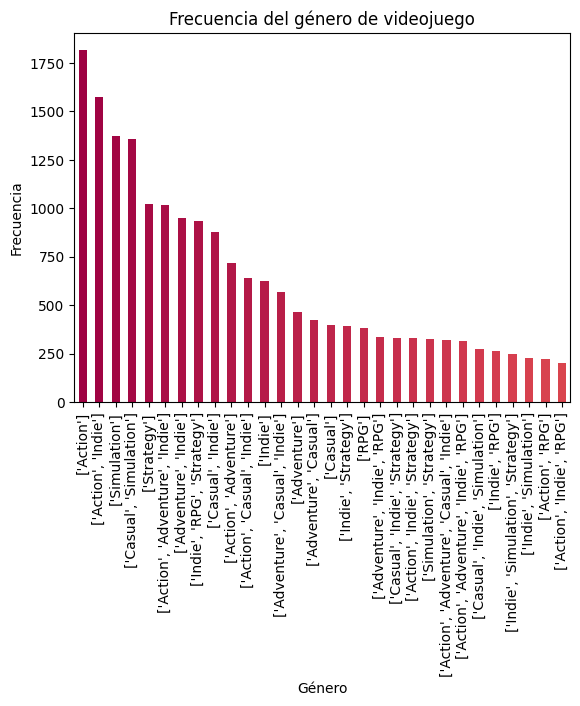

In [37]:
# Gráfico de los géneros de los videojuegos más visitados:
colors = plt.cm.Spectral(range(len(genre_counts)))
genre_counts.plot(kind='bar', color=colors)
plt.title('Frecuencia del género de videojuego')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

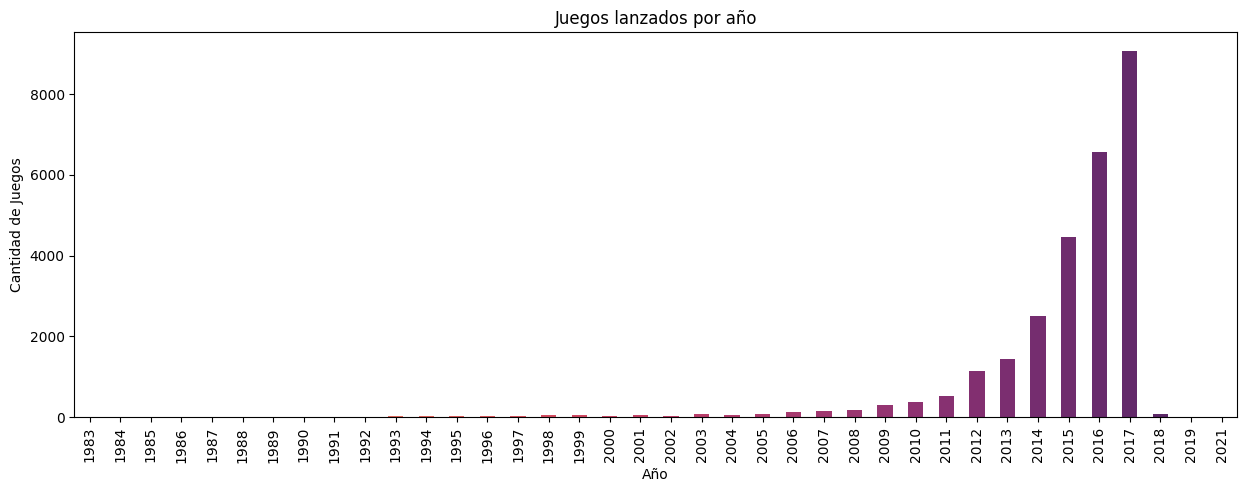

In [38]:
colors = sns.color_palette("flare", len(steam_games['year'].value_counts()))
# Creamos el gráfico de barras para ver la cantidad de juegos lanzados por año
steam_games['year'].value_counts().sort_index().plot(kind='bar', figsize=(15, 5), color=colors)

plt.title('Juegos lanzados por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Juegos')
plt.show()

En este gráfico  se ilustra la distribución del número de juegos lanzados por año, lo que puede ayudar a visualizar las tendencias de lanzamiento de juegos a lo largo del tiempo.

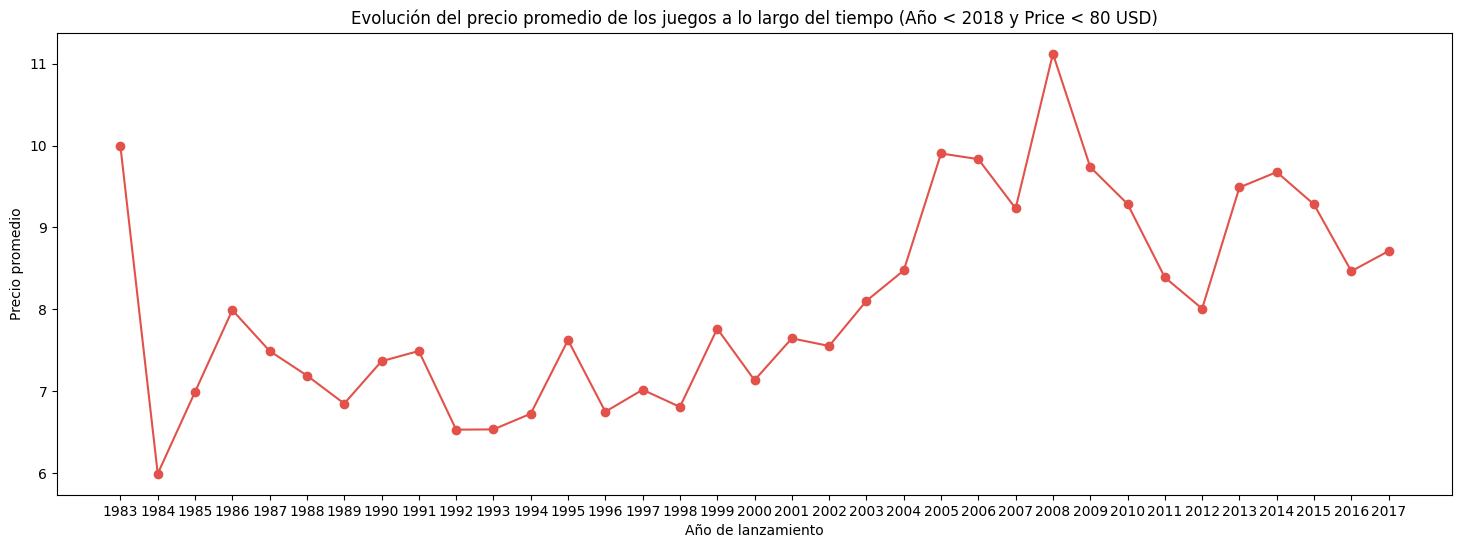

In [39]:
steam_games['price'] = pd.to_numeric(steam_games['price'], errors='coerce', downcast='integer')
steam_games['year'] = pd.to_numeric(steam_games['year'], errors='coerce', downcast='integer')
# Filtramos los datos para incluir solo los juegos con año menor a 2018 y precio menor a 80
df_filtered = steam_games[(steam_games['year'] < 2018) & (steam_games['price'] < 80)]

# Convertimos los valores en la columna 'year' a tipo entero
df_filtered['year'] = df_filtered['year'].astype(int)

# Agrupamos los datos por el año de lanzamiento y calcular el precio promedio para cada año
precio_promedio_por_anio = df_filtered.groupby('year')['price'].mean()

# Creamos el gráfico de la evolución del precio promedio a lo largo del tiempo
plt.figure(figsize=(18, 6))
plt.plot(precio_promedio_por_anio.index, precio_promedio_por_anio.values, marker='o', linestyle='-')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Precio promedio')
plt.title('Evolución del precio promedio de los juegos a lo largo del tiempo (Año < 2018 y Price < 80 USD)')
plt.xticks(range(int(df_filtered['year'].min()), int(df_filtered['year'].max()) + 1, 1))
plt.show() 

Resultado: el mayor precio se dio entre los años 2008 y 2009 y el precio menor en 1984

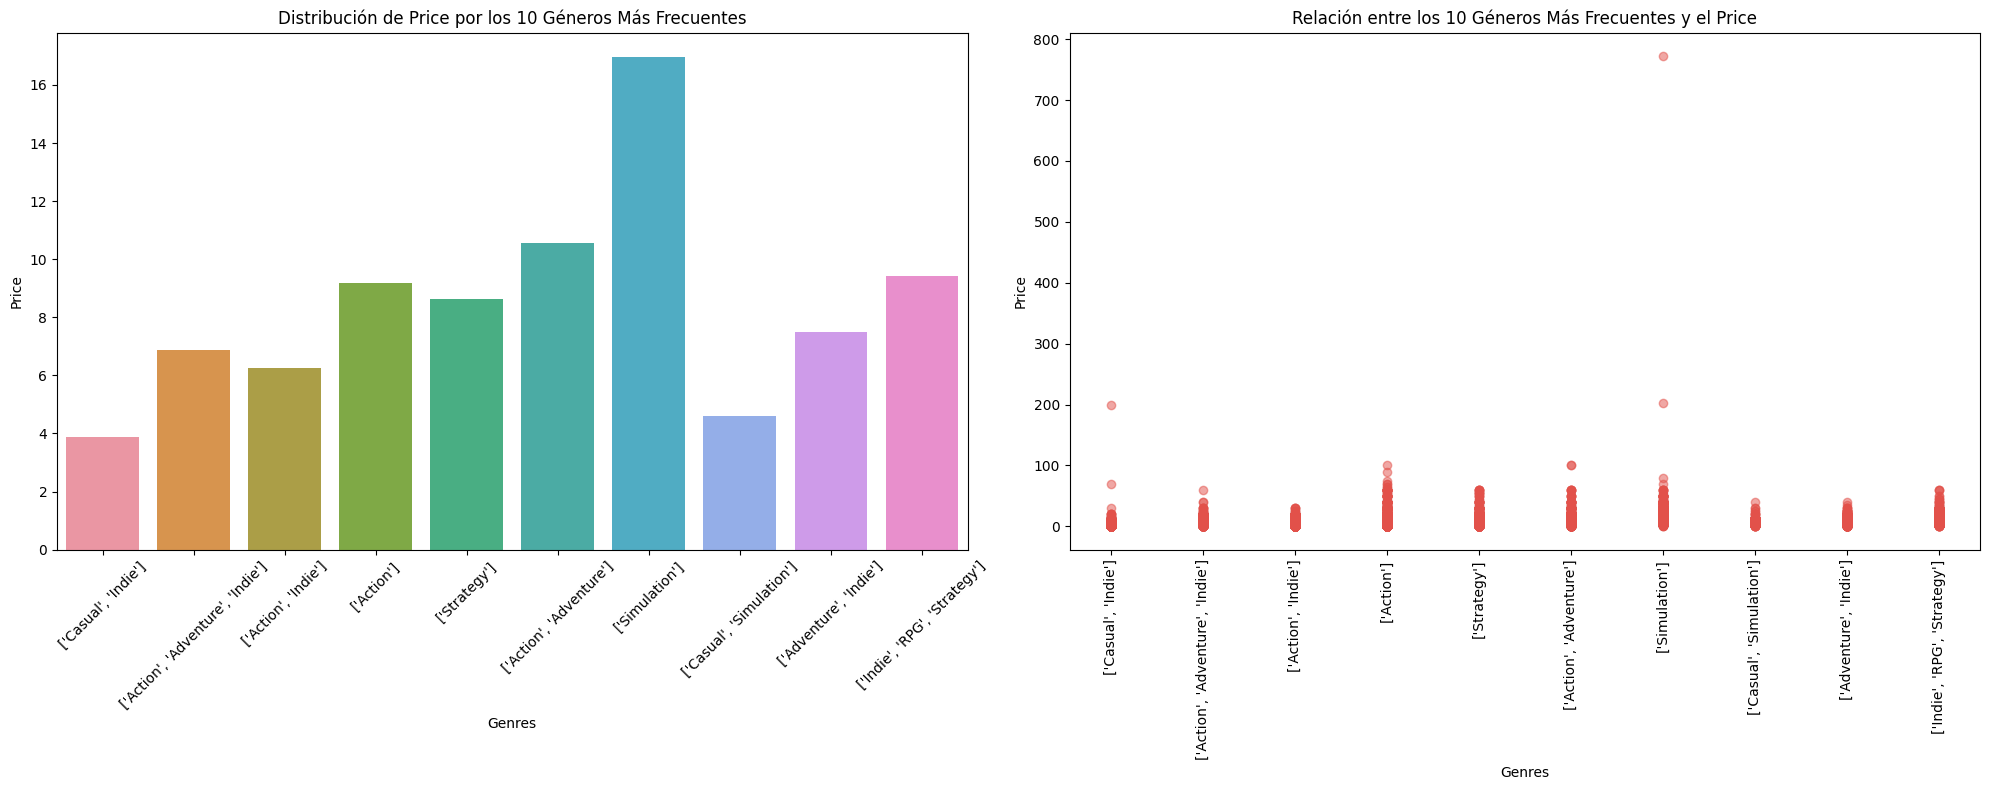

In [40]:
# Obtener los 10 géneros más frecuentes
top_10_genres = steam_games['genres'].value_counts().head(10).index.tolist()

# Filtrar el DataFrame para incluir solo los 10 géneros más frecuentes
filtered_data = steam_games[steam_games['genres'].isin(top_10_genres)]

# Crear una figura con dos subplots en una fila
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Crear el gráfico de barras en el primer subplot
sns.barplot(data=filtered_data, x='genres', y='price', ci=None, ax=axs[0])
axs[0].set_xlabel('Genres')
axs[0].set_ylabel('Price')
axs[0].set_title('Distribución de Price por los 10 Géneros Más Frecuentes')
axs[0].tick_params(axis='x', rotation=45)

# Crear el gráfico de dispersión en el segundo subplot
axs[1].scatter(filtered_data['genres'], filtered_data['price'], alpha=0.5)
axs[1].set_xlabel('Genres')
axs[1].set_ylabel('Price')
axs[1].set_title('Relación entre los 10 Géneros Más Frecuentes y el Price')
axs[1].tick_params(axis='x', rotation=90)

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar los subplots
plt.show()

Podemos observar que el precio que mas disperción tuvo fué el del género 'simulation'

EDA de user_items

In [41]:
df_items = pd.read_csv('data/user_items_clean.csv', encoding='utf-8')
df_items.head()

,user_id,items_count,steam_id,playtime_forever,id
0,76561197970982479,277,76561197970982479,6,10
1,js41637,888,76561198035864385,0,10
2,evcentric,137,76561198007712555,923,1200
3,Riot-Punch,328,76561197963445855,0,10
4,doctr,541,76561198002099482,1131,300


In [42]:
#número de filas, número de columnas
df_items.shape

(88310, 5)

In [43]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88310 entries, 0 to 88309
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           88310 non-null  object
 1   items_count       88310 non-null  int64 
 2   steam_id          88310 non-null  int64 
 3   playtime_forever  88310 non-null  int64 
 4   id                88310 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.4+ MB


In [44]:
#Observamos los nulos
df_items.isnull().sum()

user_id             0
items_count         0
steam_id            0
playtime_forever    0
id                  0
dtype: int64

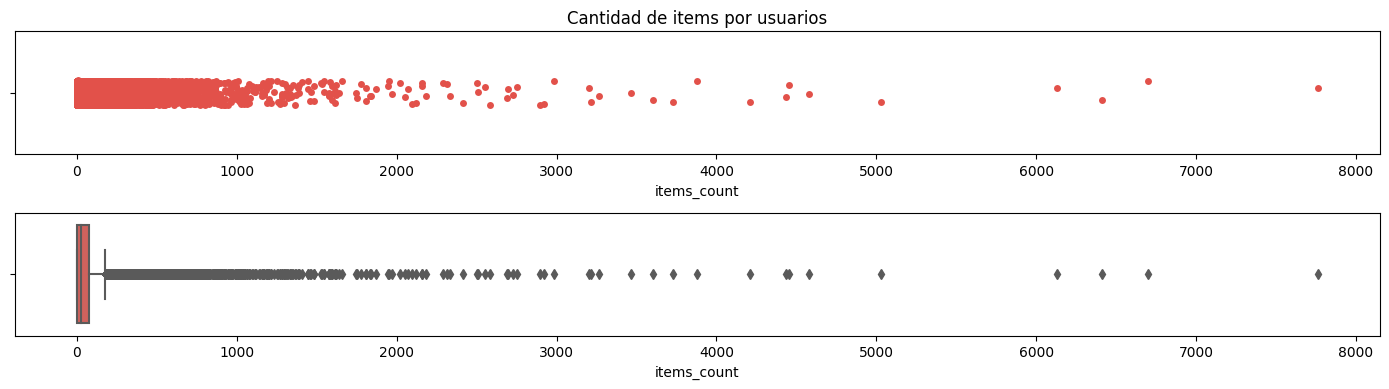

In [45]:
# Agrupamos por usuario la cantidad de items, lo convertimos en data frame y los ordenamos de mayor a menor
items_count_user = df_items.groupby('user_id')['items_count'].unique().explode()
items_count_user = pd.DataFrame(items_count_user)
items_count_user_o = items_count_user.sort_values('items_count', ascending=False)

fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=items_count_user_o, x='items_count', ax=ax1)
ax1.set_xlabel('items_count') ; ax1.set_title('Cantidad de items por usuarios')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=items_count_user_o, x='items_count', ax=ax2)
ax2.set_xlabel('items_count')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

<Figure size 1400x500 with 0 Axes>

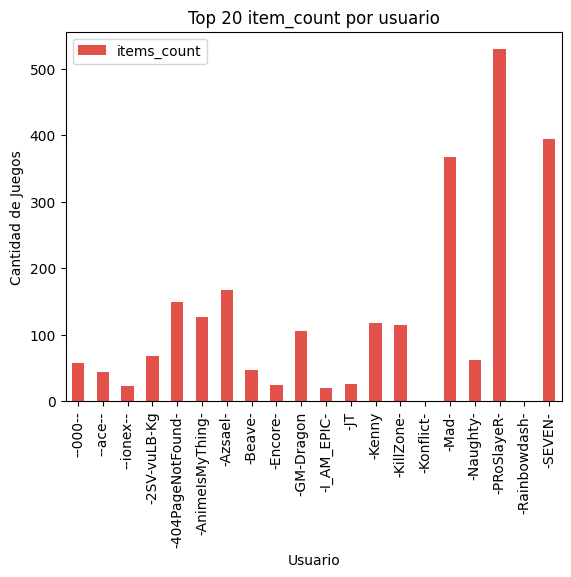

In [46]:
sns.set_palette("Spectral")
# Crear el gráfico de barras
plt.figure(figsize=(14, 5))
items_count_user[:20].plot(kind='bar')
plt.xlabel('Usuario')
plt.ylabel('Cantidad de Juegos')
plt.title('Top 20 item_count por usuario')
plt.show()

EDA de user_reviews

In [47]:
df_reviews = pd.read_csv('data/user_reviews_clean.csv', encoding='utf-8')
df_reviews.head()

,user_id,item_id,recommend,posted year,sentiment_analysis
0,76561197970982479,1250,True,2011,2.0
1,76561197970982479,22200,True,2011,2.0
2,76561197970982479,43110,True,2011,2.0
3,js41637,251610,True,2014,2.0
4,js41637,227300,True,2013,2.0


In [48]:
df_reviews.isnull().sum()

user_id               0
item_id               0
recommend             0
posted year           0
sentiment_analysis    0
dtype: int64

In [49]:
df_reviews.shape

(49186, 5)

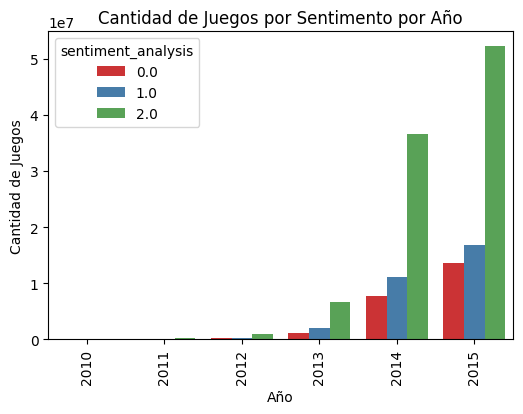

In [50]:
# Realizamos un join de los dataframes 
merged_df = pd.merge(steam_games, df_reviews, left_on='year', right_on='posted year')

# Luego, puedes calcular la media de 'sentiment_analysis' por año y crear el gráfico
mean_sentiment_by_year = merged_df.groupby('year')['sentiment_analysis'].mean()

# Crea el gráfico de barras
plt.figure(figsize=(6, 4))
sns.countplot(data=merged_df, x='year', hue='sentiment_analysis', palette='Set1')

plt.xlabel('Año')
plt.ylabel('Cantidad de Juegos')
plt.title('Cantidad de Juegos por Sentimento por Año')
plt.xticks(rotation=90)

plt.show()